In [1]:
import cufflinks as cf

In [2]:
# You can go offline on demand by using 
cf.go_offline()

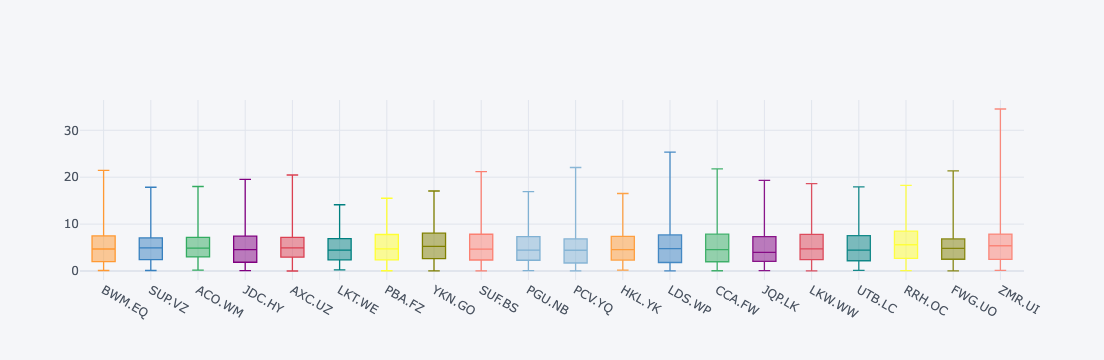

In [3]:
# And you are all set!
cf.datagen.box(20).iplot(kind='box',legend=False)

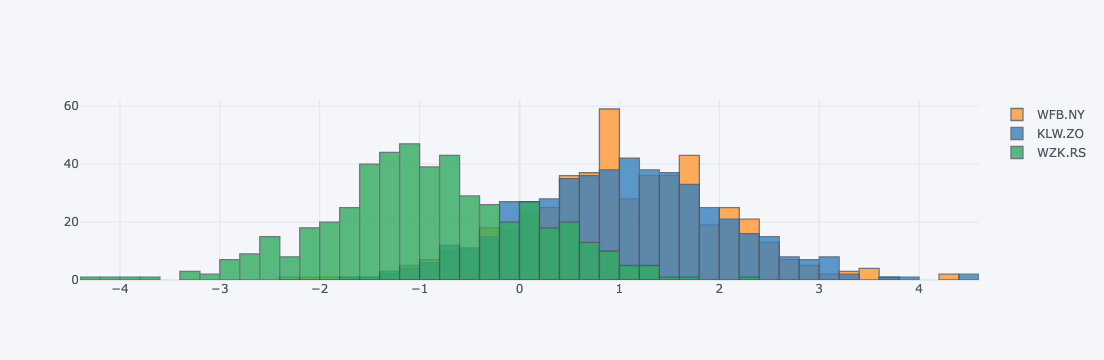

In [4]:
fig=cf.datagen.histogram(3).figure(kind='histogram')
cf.iplot(fig,online=False)

https://plotly.com/python/ipython-notebook-tutorial/

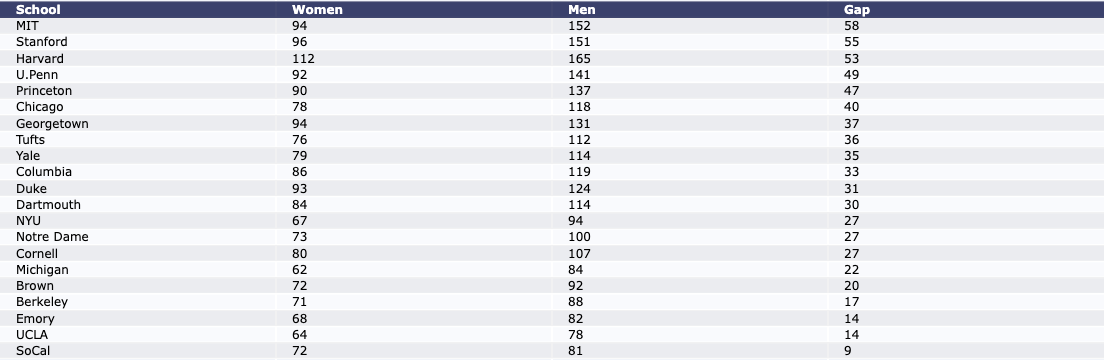

In [30]:
#import chart_studio.plotly as py
import plotly.offline as py
import plotly.figure_factory as ff
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv")

table = ff.create_table(df)
py.iplot(table, filename='jupyter-table1')

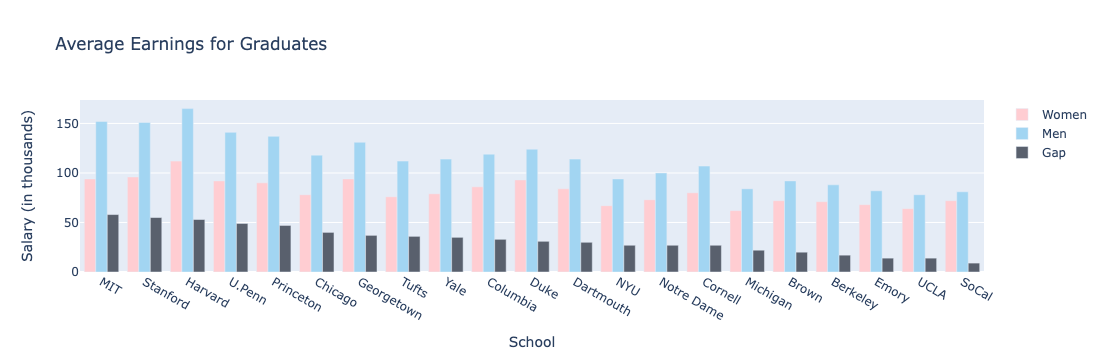

In [8]:
import chart_studio.plotly as py
import plotly.graph_objects as go

trace_women = go.Bar(x=df.School,
                  y=df.Women,
                  name='Women',
                  marker=dict(color='#ffcdd2'))

trace_men = go.Bar(x=df.School,
                y=df.Men,
                name='Men',
                marker=dict(color='#A2D5F2'))

trace_gap = go.Bar(x=df.School,
                y=df.Gap,
                name='Gap',
                marker=dict(color='#59606D'))

data = [trace_women, trace_men, trace_gap]

layout = go.Layout(title="Average Earnings for Graduates",
                xaxis=dict(title='School'),
                yaxis=dict(title='Salary (in thousands)'))

fig = go.Figure(data=data, layout=layout)

cf.iplot(fig, sharing='private', filename='jupyter-styled_bar')

https://plotly.com/python/v3/ipython-notebooks/mne-tutorial/

In [12]:
import mne

In [10]:
from mne.datasets import sample
data_path = sample.data_path()

raw_fname = str(data_path) + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'

In [13]:
raw = mne.io.Raw(raw_fname, preload=False)
print(raw)

Opening raw data file /home/kotech/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~3.3 MB, data not loaded>


In [14]:
data, times = raw[:, :10]
print(data.shape)

(376, 10)


In [17]:
start, stop = raw.time_as_index([100, 115])  # 100 s to 115 s data segment
data, times = raw[:306, start:stop]
print(data.shape)
print(times.shape)
print(times.min(), times.max())

(306, 2252)
(2252,)
99.99750418577312 114.98880501309083


In [18]:
picks = mne.pick_types(raw.info, meg='mag', exclude=[])
print(picks)

[  2   5   8  11  14  17  20  23  26  29  32  35  38  41  44  47  50  53
  56  59  62  65  68  71  74  77  80  83  86  89  92  95  98 101 104 107
 110 113 116 119 122 125 128 131 134 137 140 143 146 149 152 155 158 161
 164 167 170 173 176 179 182 185 188 191 194 197 200 203 206 209 212 215
 218 221 224 227 230 233 236 239 242 245 248 251 254 257 260 263 266 269
 272 275 278 281 284 287 290 293 296 299 302 305]


TypeError: iplot() got an unexpected keyword argument 'update'

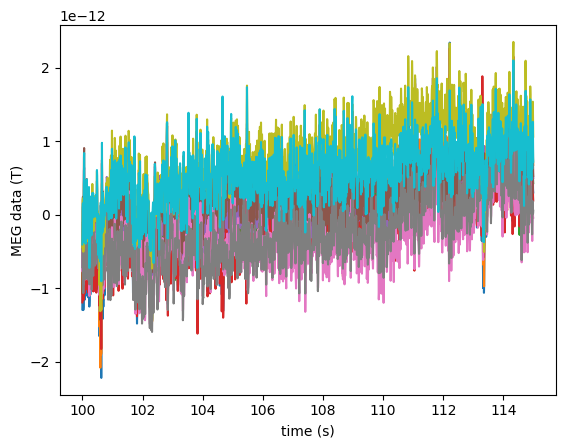

In [29]:
picks = mne.pick_types(raw.info, meg='mag', exclude=[])
data, times = raw[picks[:10], start:stop]

import matplotlib.pyplot as plt

plt.plot(times, data.T)
plt.xlabel('time (s)')
plt.ylabel('MEG data (T)')

update = dict(layout=dict(showlegend=True), data=[dict(name=raw.info['ch_names'][p]) for p in picks[:10]])
py.iplot(plt.gcf(), update=update)

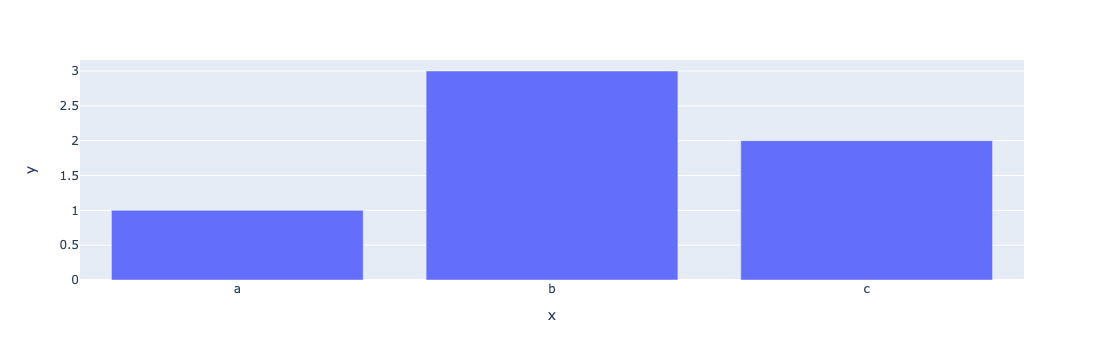

In [22]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

https://plotly.com/python/ipython-notebook-tutorial/

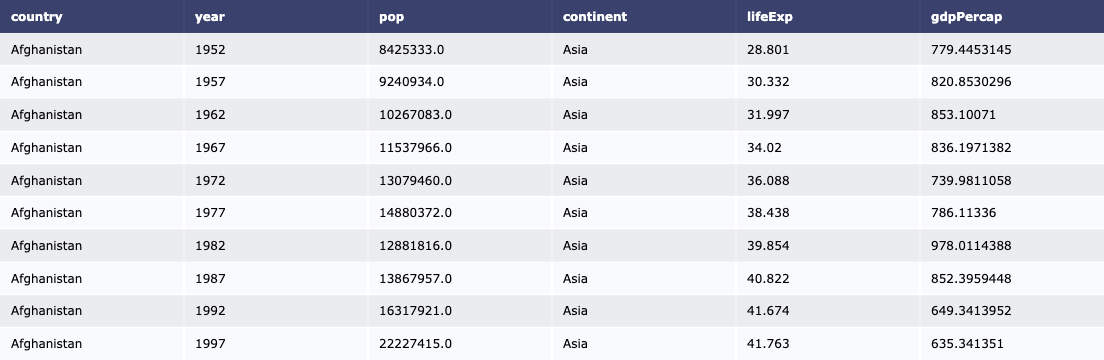

In [28]:
import plotly.offline as py
from chart_studio.grid_objs import Grid, Column
#from plotly.tools import FigureFactory as FF
from plotly import figure_factory as FF

# chart_studio is for online mode only
# import chart_studio.plotly as py
# from chart_studio.grid_objs import Grid, Column
# import plotly.figure_factory as FF

import pandas as pd
import time
import pickle

filename_pickle='dataset.pkl'
try:
    dataset=pd.read_pickle(filename_pickle)
except FileNotFoundError: 
    url = 'https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv'
    dataset = pd.read_csv(url)
    dataset.to_pickle(filename_pickle)

table = FF.create_table(dataset.head(10))
py.iplot(table, filename='animations-gapminder-data-preview')


https://community.plotly.com/t/plot-a-line-chart-with-checkboxes-from-indexed-data-frame/14407/2

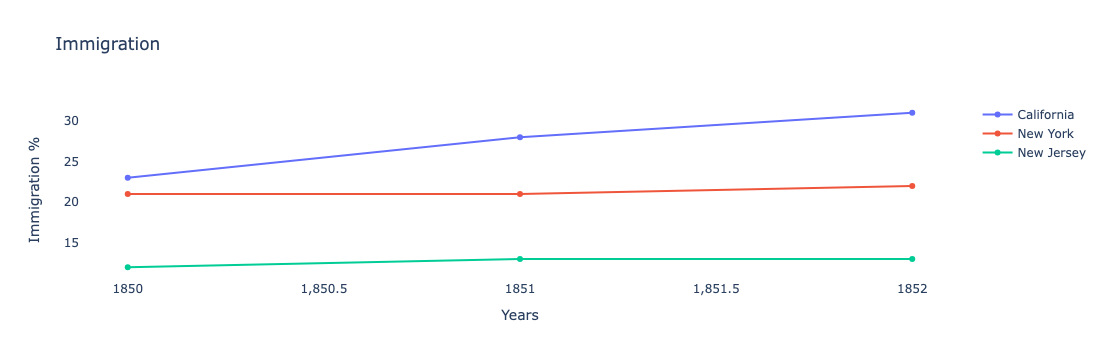

In [36]:
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py

immigration = pd.DataFrame({
    'State': ['California', 'New York', 'New Jersey'],
    1850: [23, 21, 12],
    1851: [28, 21, 13],
    1852: [31, 22, 13]}).set_index('State')

data = [go.Scatter(x=immigration.columns,
                   y=immigration.loc[state],
                   name=state) for state in immigration.index]

layout = go.Layout(
    plot_bgcolor="white",
    title='Immigration',
    yaxis=dict(title='Immigration %'),
    xaxis=dict(title='Years')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

https://plotly.com/python/line-charts/

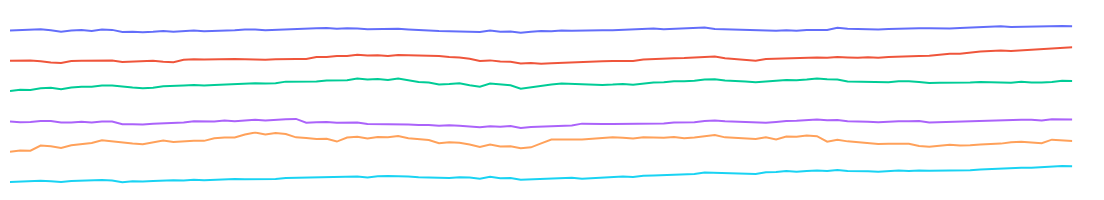

In [35]:
import plotly.express as px
df = px.data.stocks(indexed=True)
fig = px.line(df, facet_row="company", facet_row_spacing=0.01, height=200, width=200)

# hide and lock down axes
fig.update_xaxes(visible=False, fixedrange=True)
fig.update_yaxes(visible=False, fixedrange=True)

# remove facet/subplot labels
fig.update_layout(annotations=[], overwrite=True)

# strip down the rest of the plot
fig.update_layout(
    showlegend=False,
    plot_bgcolor="white",
    margin=dict(t=10,l=10,b=10,r=10)
)

# disable the modebar for such a small plot
fig.show(config=dict(displayModeBar=False))